# Predicting Cardiovascular Disease

__Enter Subtitle here if any__

# Overview
Cardiovascular disease(CVD), also known as heart disease is the leading cause of death worldwide taking an estimated 17.9 million lives each year. In the United states, one person dies every 36 seconds from cardiovascular disease.From 2014 to 2015, the Heart disease costs in United States was about $219 billion. Therefore, it is very important to understand the correlations with the risk factors. In this project I will explore the dataset to understand the correlation and use a machine learning model to predict heart disease. Also, I will compare among different models and present the accuracy of each model.

The model accuracy must be sufficiently high(at least 95\%). Because it is not wise to predict if a person has heart disease based on a model that is not accurate enough. Therefore, if our model prediction accuracy is fairly accurate, we can say that the project is successful. 

There are several factor like High blood pressure, high blood cholesterol smoking, glucose, obesity etc. are key risk factors for CVD. In, this project, I have explored the dataset and tried to find the correlation among them. Whatever the accuracy is, We can still gain some insight by just exploring the data which is why this problem is interesting.

- Tell us who might be interested in your project.
Healthcare professionals, researchers who are involved in biomedical research, insurance companies and researcher who are developing point of care testing kit might be interested in this project.

- What has already been done on the problem you are working on?
Although similar works like finding correlation among the features and fitting different machine learning model etc.have already been done, sufficient accuracy is yet to be achieved.


# Getting the data

Who collected the original data.
The data is obtained  from data repository of Svetlana Ulianova in kaggle.

When is the data collected?
The data was collected in Jan 2019.

The data is stored in a csv file with a delimiter of ';'.

It has 70000 rows and 13 columns. There is no missing value in the dataset.

The size of the data is 2.81 MB
The data can be found in this [link](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)

This is a supervised learning problem. Our target column is the 13th column named 'cardio' which is important. Besides, age, cholesterol etc.these columns are also important

# EDA

In [4]:
import pandas as pd
df = pd.read_csv('cardio.csv',delimiter=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.shape

(70000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Preparing Data
I have converted the  column 'age' to 'years' and dropped the 'id' column. 


In [8]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

# Modeling

I have used Random Forest Classifier, KNearest neighbor and Decision Tree classifier. Only two are presented here. 
I think at least 90% accuracy should be a good baseline.
I will focus on the accuracy of the models. Because, accuracy should be the first priority. We have to be carefull about it as this deals with human lives.

In [9]:
## Decision tree model
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
#Decision tree
dt = DecisionTreeClassifier(random_state=0)
dt_scores = cross_val_score(dt, X, Y, cv=5)
print(dt_scores.mean())

0.5832571428571429


In [19]:
## KNearest Neighbors
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(20)
score=cross_val_score(knn_classifier,X,Y,cv=5)
Accuracy = score.mean()
Accuracy

0.5206142857142858

# Fine Tune 

In [15]:
dec_scores =[]
for x in range(1,15):
    dec = DecisionTreeClassifier(max_depth=x)
    score = cross_val_score(dec, X, Y, cv=5)
    dec_scores.append(score.mean())

Text(0.5, 1.0, 'Classifier scores')

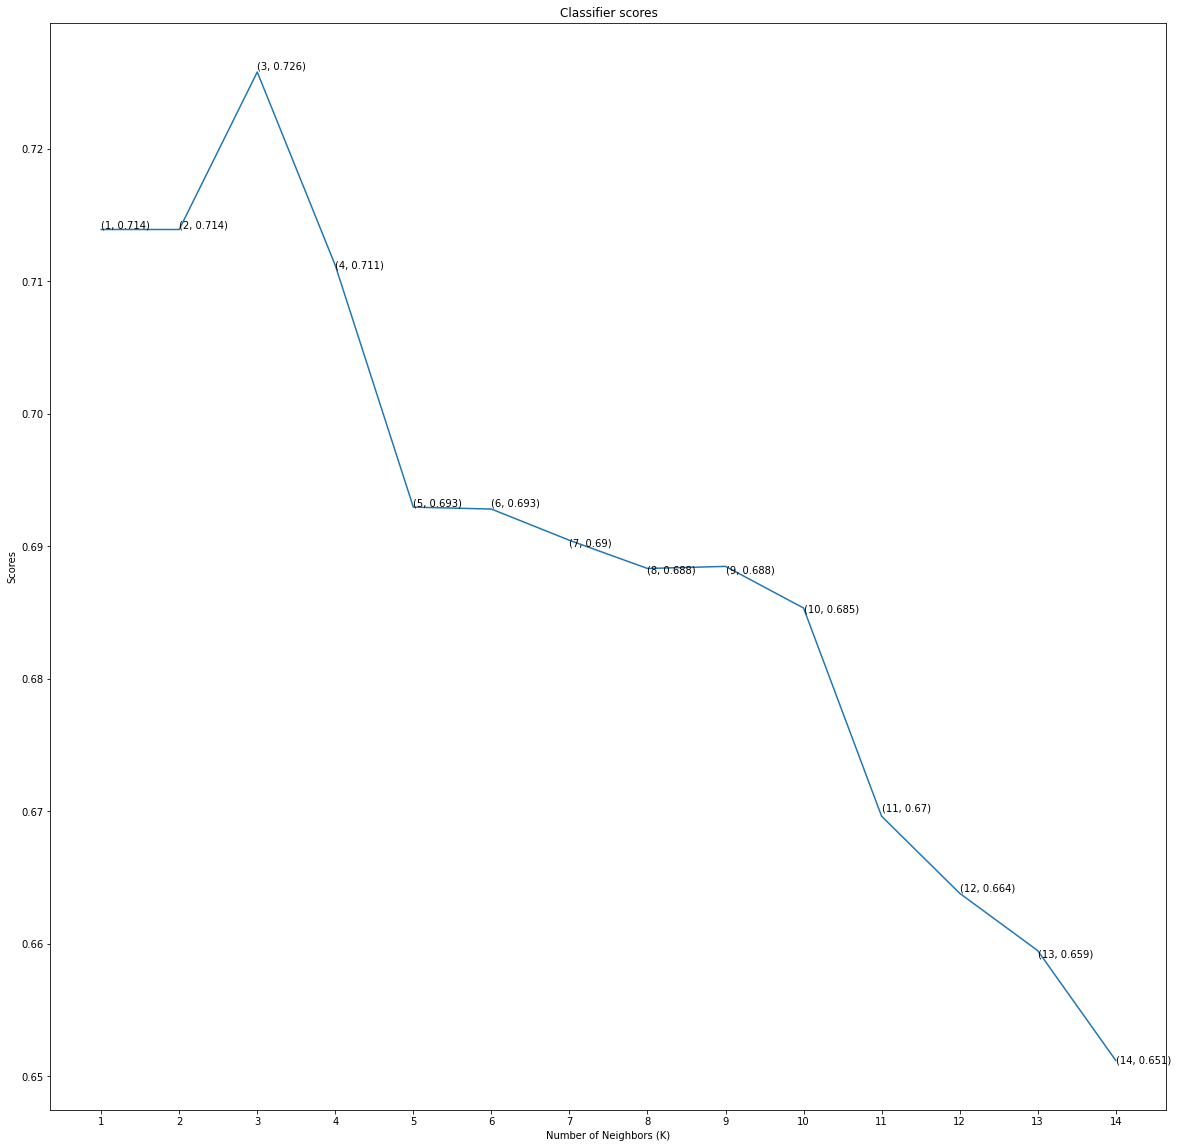

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.plot([x for x in range(1,15)],dec_scores)
for i in range(1,15):
    plt.text(i,dec_scores[i-1].round(3),(i,dec_scores[i-1].round(3)))
    plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('Classifier scores')

# Solution
Our KNN accuracy is 52% and Decision tree accuracy was 58%.
By fine tuning our model, we get the model accuracy of 72.6% at max depth of 3 which is not good for a sensitive issue like this. Therefore, we can not say that our project can successfully predic heart disease.
There are other features and factors that are not considered in this project.If the number of feature increses, our model accuracy may increase.  
